<a href="https://colab.research.google.com/github/SumitSonar/CAPTCHA-Solver/blob/main/captchamode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

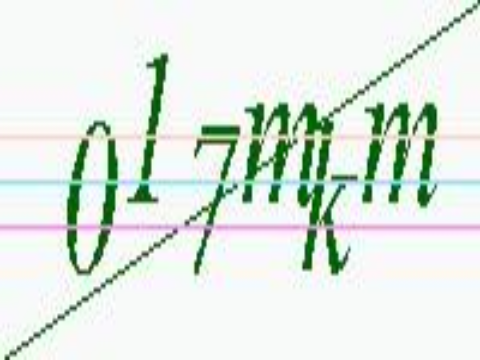

-1

In [55]:
"""Importing the modules"""
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

"""Importing the image and resizing it"""
BASE_IMG = cv2.imread(r"/content/267.jpg")
BASE_IMG = cv2.resize(BASE_IMG, (480, 360))
img = cv2.imread(r"/content/267.jpg",cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (480, 360))

"""Converting it to binary image and trying my best to get rid of the lines"""
_, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
img = ~img
img = cv2.erode(img, np.ones((2, 1), np.uint8), iterations=2)
img = cv2.dilate(img, (5, 4), iterations = 15)
img = cv2.Canny(img, 100, 100, edges=1)

# Use cv2_imshow() instead of cv2.imshow()
cv2_imshow(BASE_IMG)  # Display BASE_IMG
cv2.waitKey(0)

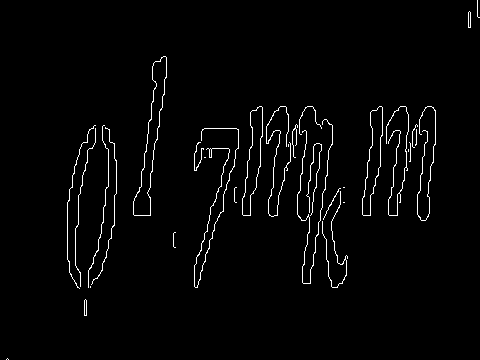

In [56]:
cv2_imshow(img)       # Display img

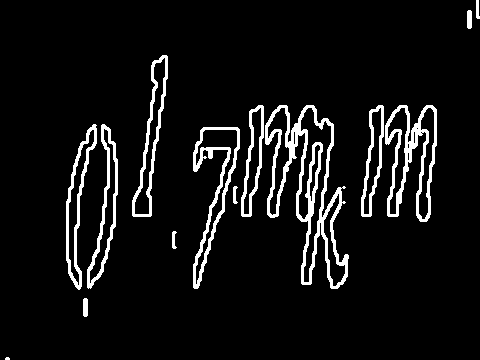

True

In [57]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Find contours in the image
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a blank image to draw the vectorized output
vector_image = np.zeros_like(BASE_IMG)

# Draw the contours on the blank image with white color
cv2.drawContours(vector_image, contours, -1, (255, 255, 255), 2)  # White color, thickness 2

# Display the vector image
cv2_imshow(vector_image)
cv2.waitKey(0)

#Optional: Save the vectorized image
cv2.imwrite("vectorized_image12.jpg", vector_image)

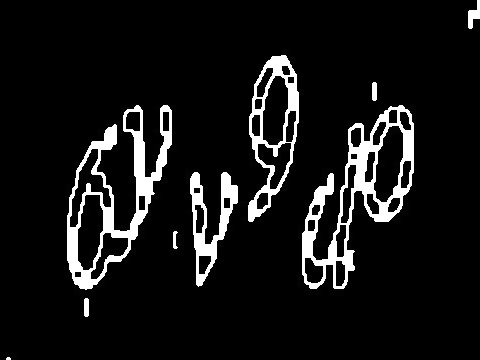

-1

In [19]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load your image (replace with your image path)
img = cv2.imread('/content/vectorized_image12.jpg', cv2.IMREAD_GRAYSCALE)

# Define the kernel (structuring element)
kernel = np.ones((5, 6), np.uint8)  # Adjust kernel size as needed

# Perform closing

closed_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# Display the result
cv2_imshow(closed_img)
cv2.waitKey(0)

In [ ]:
 # from osgeo import gdal
# import numpy as np
# import cv2

# # Load the grayscale image using OpenCV
# image = cv2.imread('/content/vectorized_image12.jpg', cv2.IMREAD_GRAYSCALE)

# # Convert to a NumPy array
# image_array = np.array(image)

# # Create a GeoTIFF raster file using GDAL
# driver = gdal.GetDriverByName('GTiff')
# rows, cols = image_array.shape
# output_raster = driver.Create('output_raster1.tif', cols, rows, 1, gdal.GDT_Byte)

# # Write the array to the raster band
# output_raster.GetRasterBand(1).WriteArray(image_array)

# # Save and close
# output_raster.FlushCache()
# output_raster = None

In [ ]:
# from PIL import Image, ImageDraw, ImageFilter

# def fill_holes(image_path):

#     img = Image.open(image_path).convert('L')  # Convert to grayscale
#     width, height = img.size

#     # Create a mask to identify potential hole areas
#     mask = Image.new('L', (width, height), 0)
#     draw = ImageDraw.Draw(mask)
#     draw.rectangle([(0, 0), (width-1, height-1)], outline=255, width=1)  # Outline the image

#     # Smooth the image to reduce noise and improve hole detection
#     img = img.filter(ImageFilter.GaussianBlur(radius=1))

#     # Threshold the image to create a binary image
#     threshold = 128  # Adjust this value as needed
#     img = img.point(lambda p: 255 if p > threshold else 0)

#     # Flood-fill the background to identify connected components
#     img_with_holes = img.copy()
#     img_with_holes.paste(255, (0, 0, width, height))   # Set background to white
#     img_with_holes = Image.composite(img, img_with_holes, mask)  # Combine with mask

#     # Find connected components
#     connected_components = img_with_holes.convert('1').getcolors()

#     # Sort connected components by size (largest first)
#     connected_components.sort(key=lambda x: x[0], reverse=True)

#     # Fill holes in the largest connected component (assumed to be the character)
#     largest_component_color = connected_components[0][1]
#     for x in range(width):
#         for y in range(height):
#             if img_with_holes.getpixel((x, y)) != largest_component_color:
#                 img.putpixel((x, y), 255)  # Fill with white

#     return img

In [ ]:
# if __name__ == "__main__":
#     image_path = "/content/vectorized_image12.jpg"  # Replace with the actual image path
#     filled_image = fill_holes(image_path)
#     filled_image.save("filled_image.png")

In [ ]:
# # prompt: detect the edges of each alphanumeric character in image and sharpen it and just return vector image as output

# import cv2
# import numpy as np
# from google.colab.patches import cv2_imshow
# #from osgeo import gdal # This is not needed for the task

# # ... (Your existing code for image loading and preprocessing)

# """Importing the image and resizing it"""
# BASE_IMG = cv2.imread(r"/content/vectorized_image.jpg")
# BASE_IMG = cv2.resize(BASE_IMG, (480, 360))
# img = cv2.imread(r"/content/vectorized_image.jpg", cv2.IMREAD_GRAYSCALE)
# img = cv2.resize(img, (480, 360))


# # Sharpen the image
# kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# sharpened_img = cv2.filter2D(img, -1, kernel)


# # Find contours
# contours, hierarchy = cv2.findContours(sharpened_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# # Create a blank image to draw the vectorized output
# vector_image = np.zeros_like(BASE_IMG)

# # Draw the contours on the blank image with white color
# cv2.drawContours(vector_image, contours, -1, (255, 255, 255), 2)  # Adjust thickness as needed


# # Display the vector image
# cv2_imshow(vector_image)
# cv2.waitKey(0)

# #Optional: Save the vectorized image as a vector format (SVG is recommended)
# # The below code needs additional libraries and will not run in current environment
# # import svgwrite
# # dwg = svgwrite.Drawing('vector_output.svg')
# # for contour in contours:
# #  dwg.add(dwg.polyline(contour.reshape(-1, 2).tolist(), fill='none', stroke='black'))
# # dwg.save()
# # For now, saving as a PNG instead of vector format
# cv2.imwrite("vectorized_image.png", vector_image)
